In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/khanhthanhdev/exam-mark-crawling/master/data2023final.csv'
df = pd.read_csv(url)

In [3]:
top5 = df.head()
top5

,SBD,MS_HS,Liter,English,Math,Total,Unnamed: 6
0,1001,150706877,5.50,6.25,4.25,25.75,NaN
1,1002,140173765,7.25,7.00,8.50,38.50,NaN
2,1003,118027372,6.25,7.75,8.25,36.75,NaN
3,1004,117920407,8.25,7.75,8.25,40.75,NaN
4,1005,132184087,8.50,9.50,7.00,40.50,NaN


In [4]:
count = df["id"].tolist()
len(count)

106079

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106079 entries, 0 to 106078
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       106079 non-null  int64  
 1   name     106079 non-null  object 
 2   liter    106079 non-null  float64
 3   english  106079 non-null  float64
 4   math     106079 non-null  float64
 5   total    106079 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ MB


In [6]:
print(df.tail()) 

            id                   name  liter  english  math  total
106074  221082    Nguyễn Ngọc Anh Thư   7.25     9.50   9.0  41.50
106075  221083          Dương Đức Tín   8.00    10.00   9.0  44.00
106076  221084      Nguyễn Minh Trang   8.25     9.75   8.5  44.25
106077  221085      Trần Thị Thanh Tú   8.00    10.00   9.0  43.00
106078  221086  Hoàng Nguyễn Khuê Văn   8.25    10.00   9.0  44.50


In [7]:
df.describe()

,id,liter,english,math,total
count,106079.000000,106079.000000,106079.000000,106079.000000,106079.000000
mean,103355.797679,6.220434,6.454699,6.968223,32.831796
std,59504.520240,1.855599,2.364333,2.308013,9.658120
min,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,52171.500000,5.250000,4.500000,6.000000,27.500000
50%,103125.000000,6.750000,6.750000,7.750000,35.250000
75%,156526.500000,7.500000,8.500000,9.000000,40.500000
max,221086.000000,9.500000,10.000000,10.000000,48.500000


In [9]:
input_search = input("Nhập tên cần tìm kiếm: ")
df[df['name'].str.contains(input_search)]

,id,name,liter,english,math,total
23982,47182,Trần Khánh Thành,7.50,8.75,9,41.75
104895,203372,Trần Khánh Thành,7.75,9.50,9,43


In [8]:
df.nlargest(3, 'liter')

,id,name,liter,english,math,total
12926,26343,Quách Thị Khánh Vy,9.5,8.00,1.00,45.00
21307,42135,Nguyễn Thị Kim Bình,9.5,8.25,7.75,45.25
29731,57423,Lê Ngọc Mai,9.5,10.00,2.75,47.00


In [22]:
# Trung bình cộng
df["liter"].mean()

6.220433639080309

In [23]:
# Phương sai
df['liter'].var()

3.4432463362111116

In [25]:
# Độ lệch chuẩn
df['liter'].std()

1.855598646316361

In [30]:
liter_sum = df['liter'].sum()
liter_count = df['liter'].count()
liter_average = liter_sum / liter_count
liter_variance = ((df['liter'] - liter_average)**2).sum() / (len(df['liter']) - 1)
liter_standard_deviation = np.sqrt(liter_variance)
print(liter_variance)
print(liter_average)
print(liter_standard_deviation)


3.4432463362111116
6.220433639080309
1.855598646316361


In [11]:
d = df.groupby('liter').size().reset_index()

d.columns = ['liter', 'count']
d.set_index('liter', inplace=True)

d


,count
liter,
0.00,120
0.25,97
0.50,248
0.75,233
1.00,1344
...,...
8.58,2
8.75,2327
9.00,1204


In [50]:
title_font = {'family':'','color':'black','size':25}
label_font = {'family':'','color':'black','size':15}

In [24]:
d = df.groupby('liter').size().reset_index()

d.columns = ['liter', 'count']
d.set_index('liter', inplace=True)
count_liter = df['liter'].value_counts().to_dict()
print(count_liter)

{7.0: 7809, 7.5: 7690, 8.0: 7002, 6.5: 6296, 7.25: 6177, 7.75: 6085, 6.75: 5729, 6.0: 5436, 6.25: 4866, 8.25: 4556, 8.5: 4228, 5.5: 4072, 5.75: 3661, 5.0: 3595, 5.25: 2949, 4.5: 2583, 8.75: 2327, 4.0: 2186, 4.75: 2133, 4.25: 1798, 3.5: 1706, 3.0: 1439, 3.75: 1416, 1.0: 1344, 9.0: 1204, 3.25: 1172, 2.5: 1008, 2.75: 970, 2.0: 824, 2.25: 762, 1.5: 598, 1.75: 567, 1.25: 426, 0.5: 248, 0.75: 233, 9.25: 166, 0.0: 120, 0.25: 97, 5.83: 30, 6.08: 25, 6.58: 23, 6.33: 23, 7.33: 19, 7.08: 19, 6.83: 18, 4.33: 18, 5.08: 16, 5.66: 16, 5.58: 14, 7.58: 13, 6.91: 13, 9.5: 12, 6.16: 12, 4.58: 11, 4.83: 11, 7.16: 10, 7.42: 10, 5.42: 10, 5.67: 10, 3.58: 10, 6.92: 10, 6.17: 10, 7.83: 9, 6.41: 9, 6.42: 9, 5.41: 9, 7.91: 9, 5.33: 8, 5.92: 8, 7.41: 7, 5.16: 6, 4.91: 6, 4.08: 6, 3.33: 6, 7.17: 6, 3.42: 6, 4.16: 5, 3.83: 5, 6.66: 5, 8.08: 5, 4.42: 5, 7.66: 5, 3.92: 5, 6.67: 5, 5.91: 4, 3.66: 4, 8.17: 4, 4.66: 4, 4.92: 4, 3.16: 3, 5.17: 3, 2.83: 3, 7.92: 3, 6.8: 3, 6.1: 2, 7.67: 2, 8.58: 2, 4.8: 2, 5.85: 2, 2.58:

In [13]:
liter_mark = list(count_liter.keys())
liter_mark_count = list(count_liter.values())

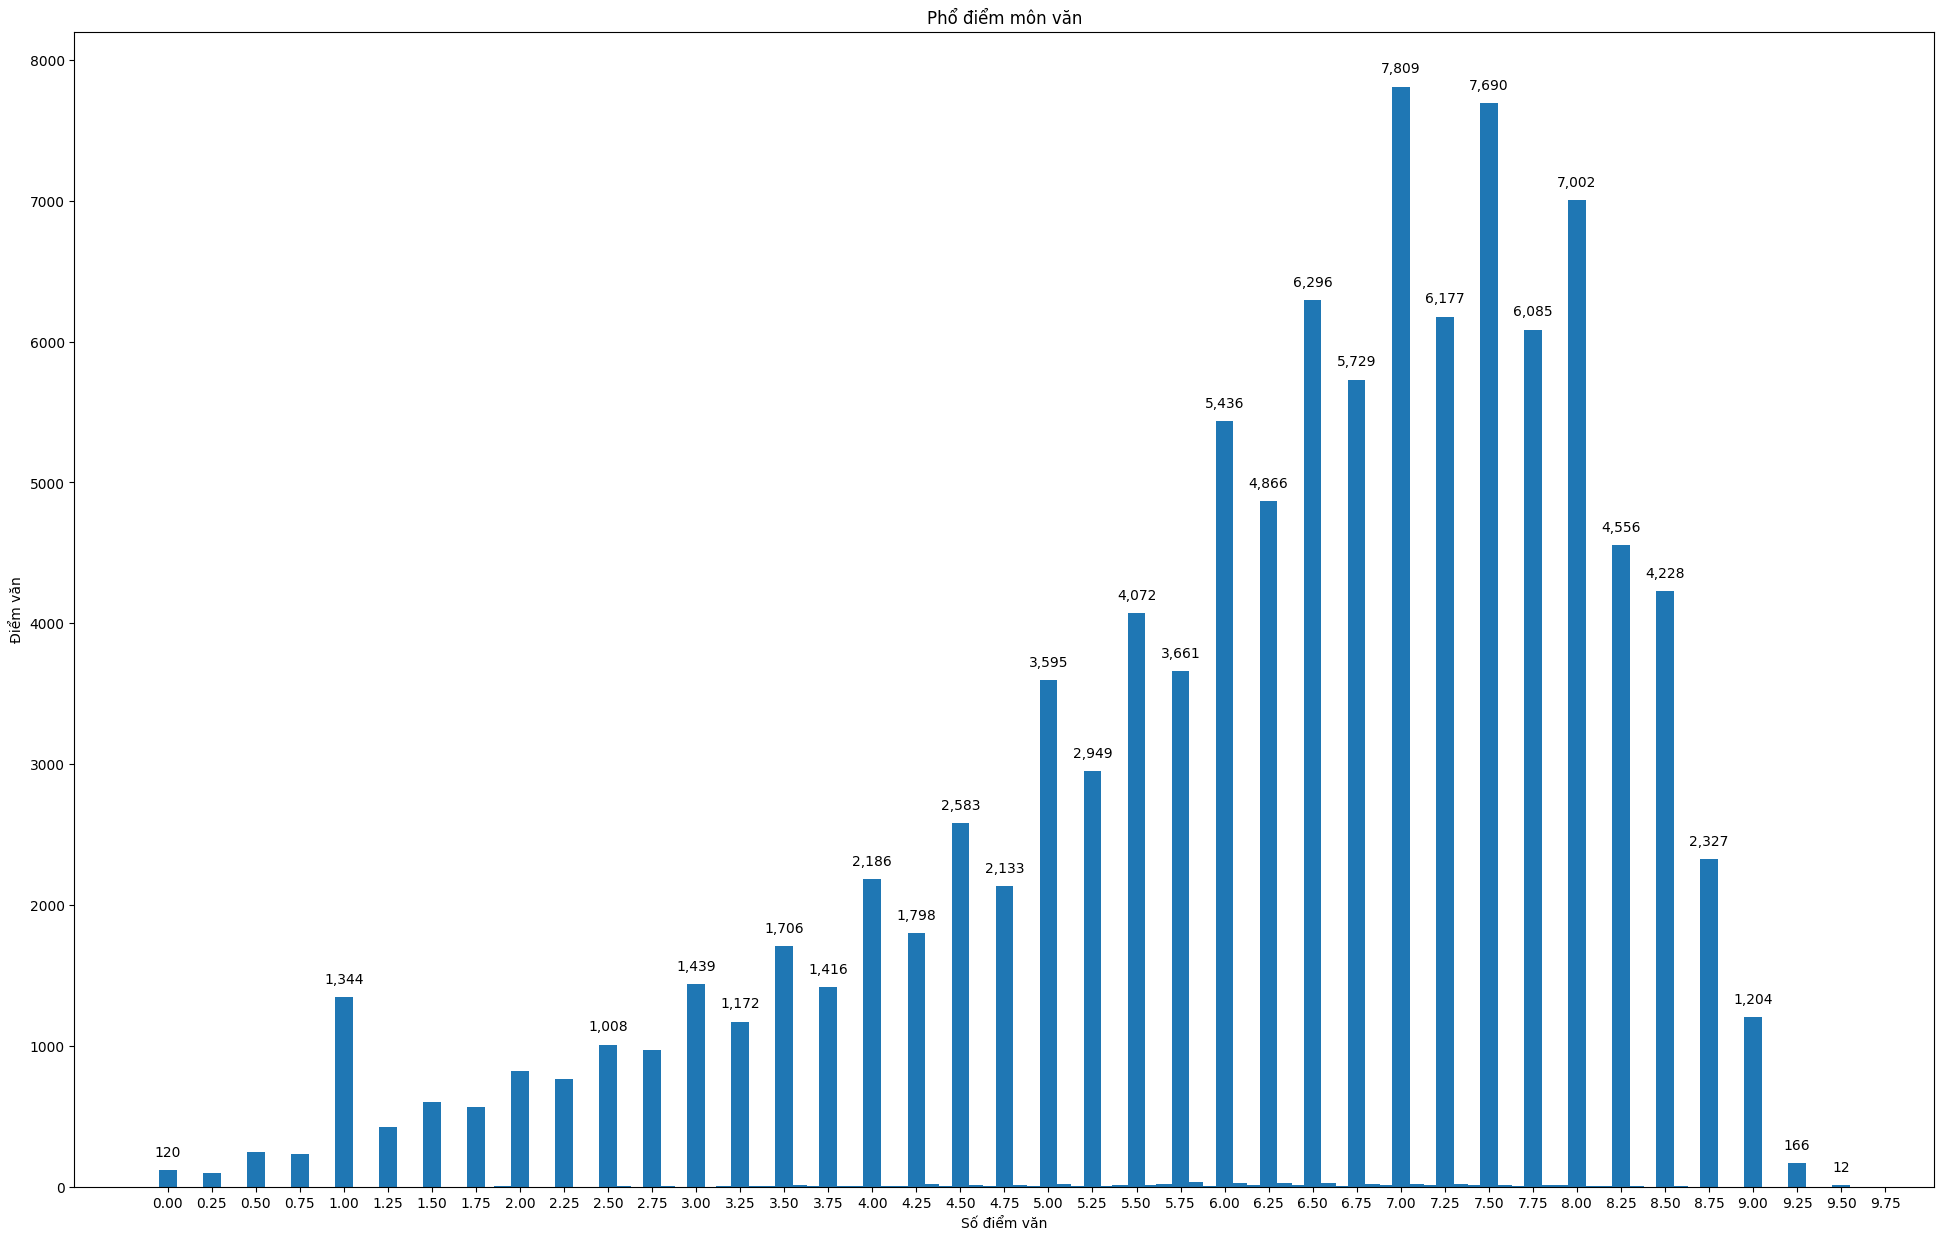

In [14]:
fig = plt.figure(figsize=(24,15))

plt.bar(liter_mark, liter_mark_count, width=0.1)
ax1 = plt.subplot(1,1,1)
plt.xlabel("Số điểm văn" )
plt.ylabel("Điểm văn" )
plt.title("Phổ điểm môn văn")
for x,y in zip(liter_mark,liter_mark_count):
    label = "{:,}".format(y)
    if y > 1000 or x == 9.5 or x == 9.25 or x == 9.0 or x == 0:
        plt.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center',)
plt.xticks(np.arange(0, 10, 0.25))
plt.savefig('liter.png')
plt.show()

In [15]:

count_english = df['english'].value_counts().to_dict()

In [16]:
english_mark = list(count_english.keys())
english_mark_count = list(count_english.values())

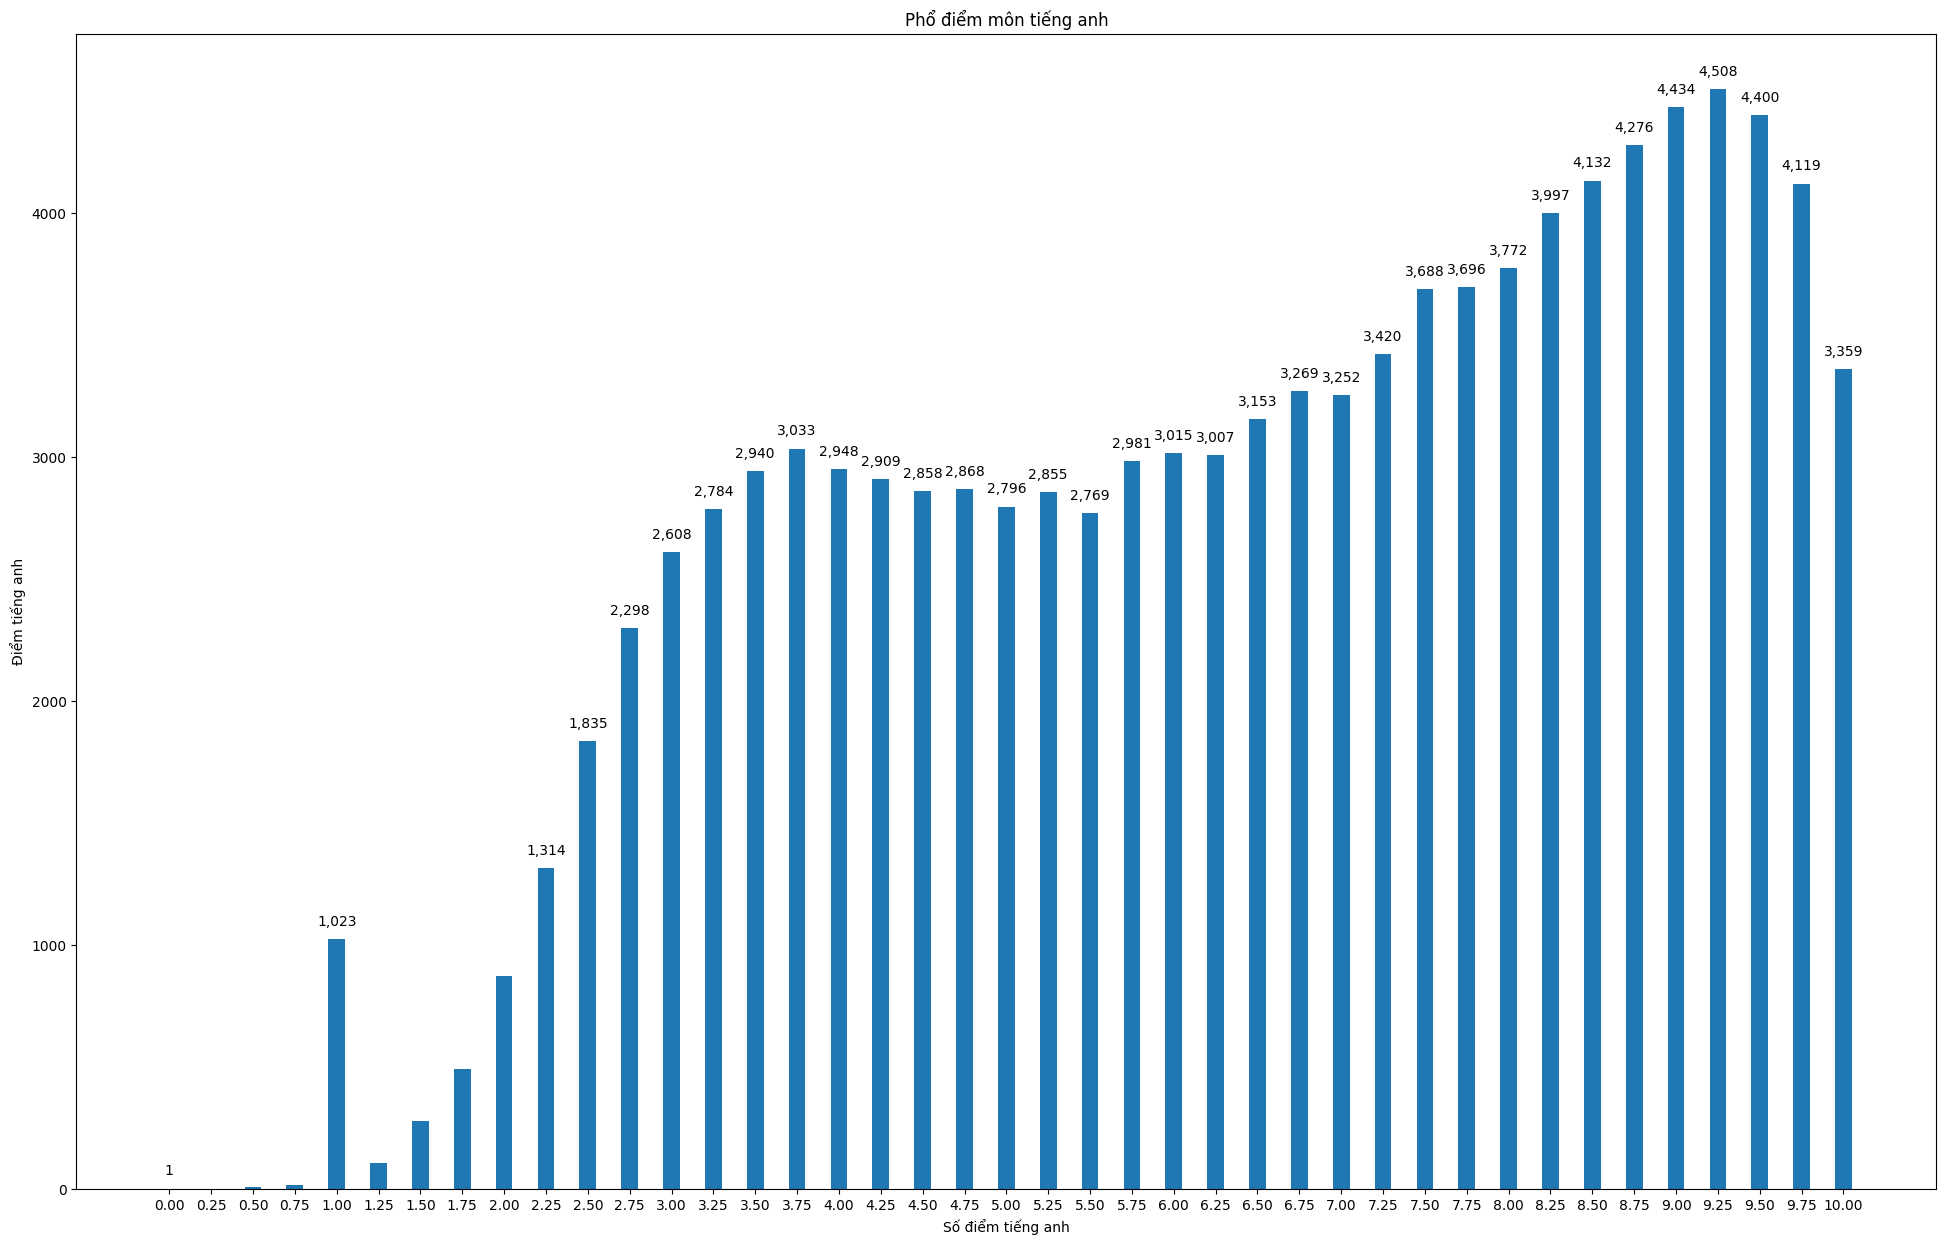

In [17]:
fig = plt.figure(figsize=(24,15))

plt.bar(english_mark, english_mark_count, width=0.1)
ax1 = plt.subplot(1,1,1)
plt.xlabel("Số điểm tiếng anh" )
plt.ylabel("Điểm tiếng anh" )
plt.title("Phổ điểm môn tiếng anh")
for x,y in zip(english_mark,english_mark_count):
    label = "{:,}".format(y)
    if y > 1000 or x == 9.5 or x == 9.25 or x == 9.0 or x == 0:
        plt.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center',)
plt.xticks(np.arange(0, 10.25, 0.25))
plt.savefig('english.png')
plt.show()

In [18]:
d = df.groupby('math').size().reset_index()

d.columns = ['math', 'count']
d.set_index('math', inplace=True)
count_math = df['math'].value_counts().to_dict()

In [19]:
math_mark = list(count_math.keys())
math_mark_count = list(count_math.values())

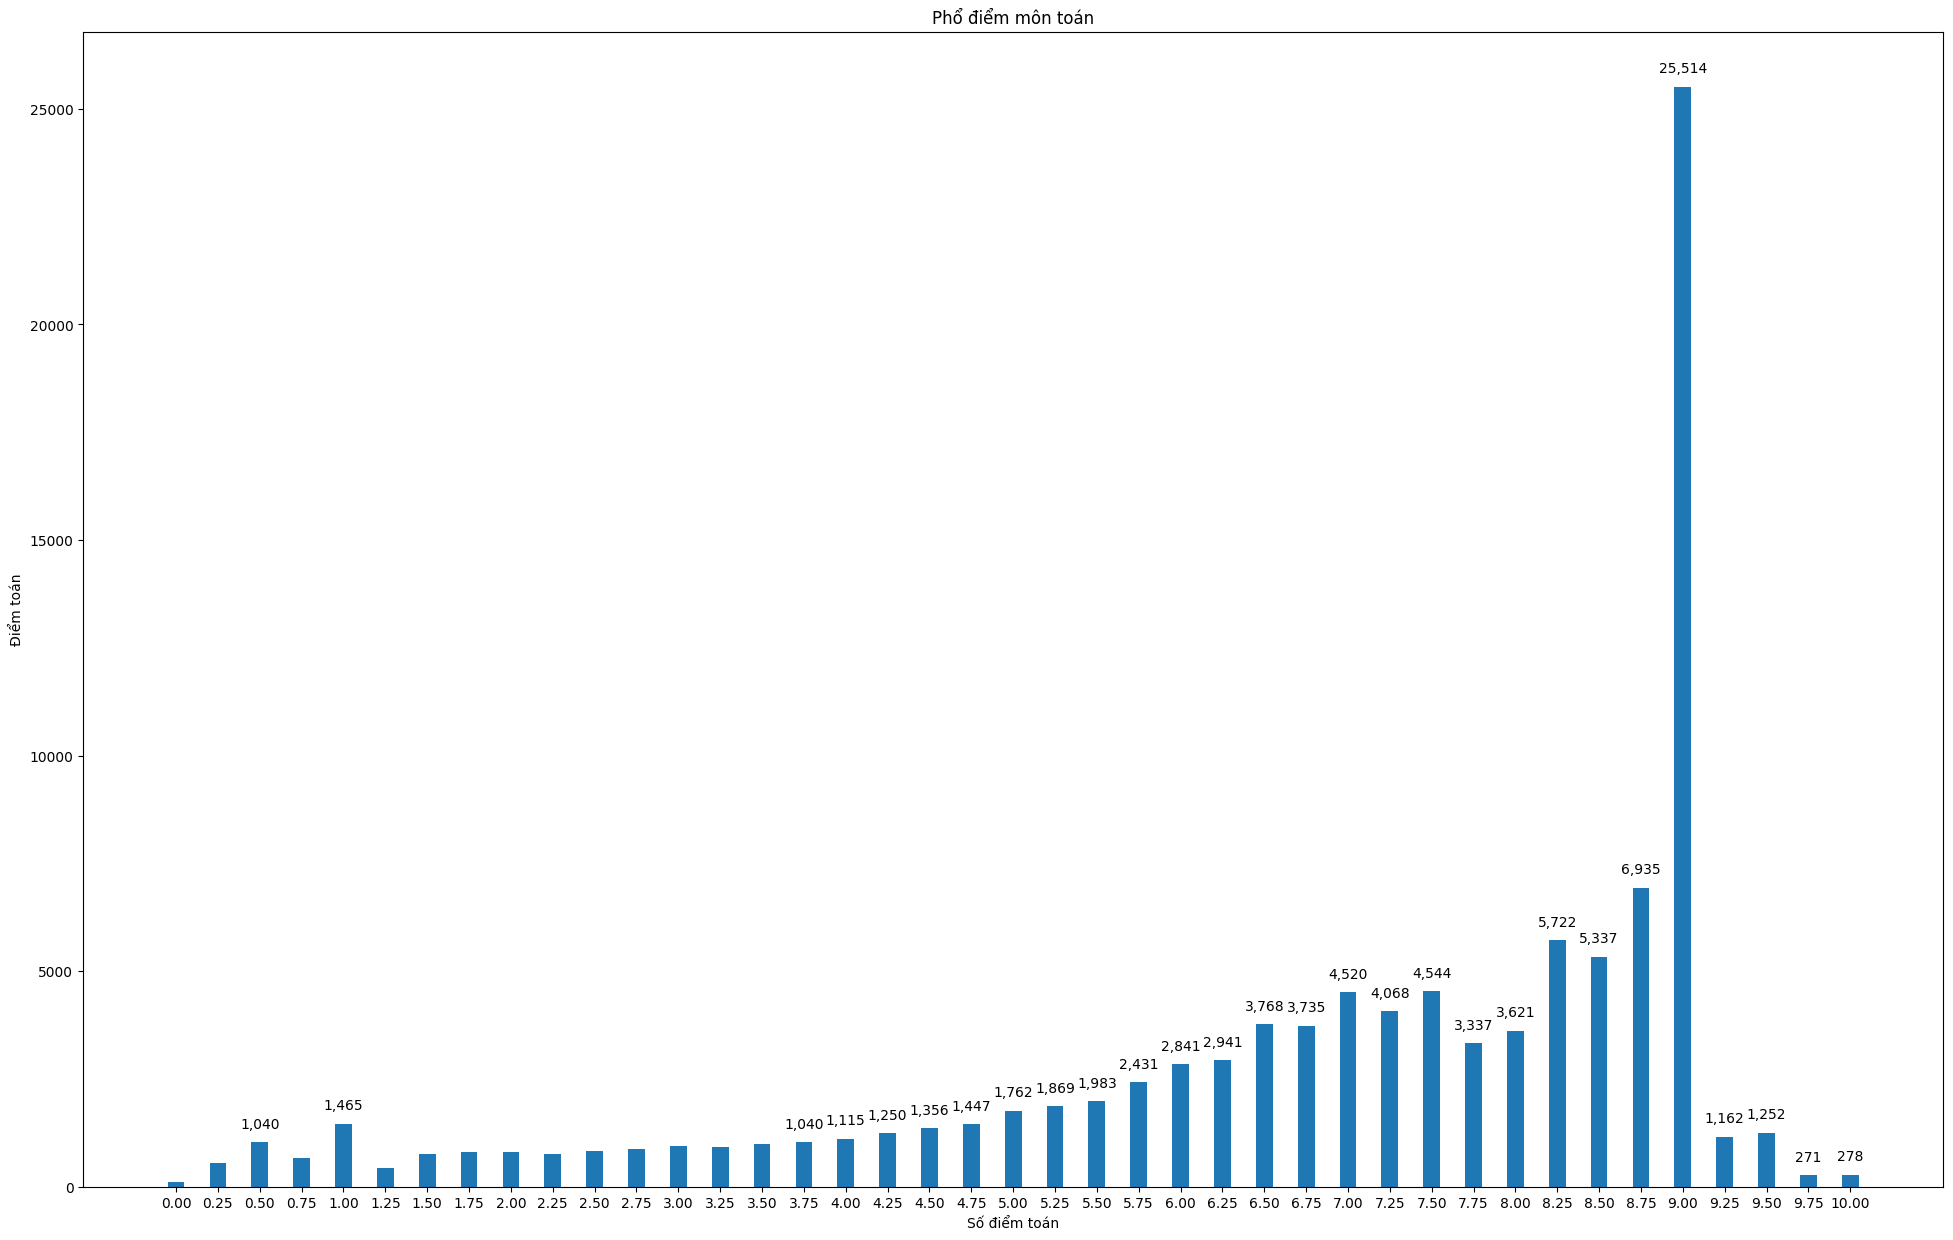

In [21]:
fig = plt.figure(figsize=(24,15))

plt.bar(math_mark, math_mark_count, width=0.1)
ax1 = plt.subplot(1,1,1)
plt.xlabel("Số điểm toán" )
plt.ylabel("Điểm toán" )
plt.title("Phổ điểm môn toán")
for x,y in zip(math_mark,math_mark_count):
    label = "{:,}".format(y)
    if y > 1000 or x == 9.75 or x == 10.0:
        plt.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center',)
plt.xticks(np.arange(0, 10.25, 0.25))
plt.savefig('math.png')
plt.show()